In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data1 = np.load('prueba_10k.npy')   
data2 = np.load('prueba_20k.npy')  
data3 = np.load('prueba_50k.npy')  
data4 = np.load('prueba_250k.npy')  

In [77]:
N=10000
D=3
maxi = [max(data1[:,0]),max(data1[:,1]),max(data1[:,2])]
l = math.ceil(max(maxi))

r1 = np.zeros((N,D))
r2 = np.zeros((N,D))

for i in range(N):
    r1[i] = np.random.uniform(0,l,D)
    r2[i] = np.random.uniform(0,l,D)    

In [78]:
#distancia entre el punto j y cada uno de los puntos de b 
def distancias(d,r):
    dist = []
#calculamos la distancia de cada uno de los puntos de "d" a cada uno de los puntos de "r", un arreglo random
#el tamaño final de "Distancias" será de N*N pues son las combinaciones de puntos que hay
    for i in d:
        Distancias = np.linalg.norm(i-r,axis=1)
        dist.extend(Distancias)
    return np.array(dist)

#funcion de correlacion
def LS1(d,r,NS):
    #NS es el numero de saltos que tendremos en r
    DD = distancias(d,d)
    RR = distancias(r,r)
    DR = distancias(d,r)
    
    rD = np.linspace(0,np.max(DD),NS)
    rR = np.linspace(0,np.max(RR),NS)
    rDR = np.linspace(0,np.max(DR),NS)
    
    e = []
    
    for i in range(NS-1):
    #contamos todas las distancias que estén en un intervalo r - r+dr  (r[i]-r[i+1])
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        NDR = len(DR[(DR >= rDR[i]) & (DR <= rDR[i+1])])
        
     #aplicamos Landy y Szalay y lo guardamos como un valor de xi de un r particular (r[i+(1/2)])     
        e.append(NDD/(NRR)-2*NDR/(NRR)+1)

    return rD[:NS-1],np.array(e)

In [79]:
def LS(r,d,bins,range_):
    sumdist = []
    n1=0
    n2=0
    n3=0
    n_DD = 0
    n_RR = 0
    n_DR = 0
    cero = 0
    bn = np.linspace(0,range_,bins)
    for i in range(3):
    
        # distancias del arreglo 'a' al mismo
        if i == 0:
                for j in d:
                    Distancias = np.linalg.norm(j-d[0:],axis=1)
                    sumdist.extend(Distancias[Distancias!=0])
                    
                
                DD,b1 = np.histogram(sumdist, bins=bn)
                n_D = len(sumdist)
                sumdist = []
                
        # distancias del arreglo 'b' al mismo                
        elif i == 1:
                for j in r:

                    Distancias = np.linalg.norm(j-r[cero:],axis=1)
                    sumdist.extend(Distancias[Distancias!=0])
                    
                
                RR,b2 = np.histogram(sumdist, bins=bn)
                n_R = len(sumdist)
                sumdist = []

        # distancias del arreglo 'a' al arreglo 'b'
        elif i == 2:
                for j in d:

                    Distancias = np.linalg.norm(j-r,axis=1)
                    sumdist.extend(Distancias)
                    
                
                DR,b3 = np.histogram(sumdist, bins=bn)
                n_DR = len(sumdist)
                sumdist = []
                
    xi = DD*n_R /  (n_D*RR)   - 2*DR*n_R/(n_DR*RR) + 1

    return b3[:bins-1],xi 

In [80]:
Num_bins = 100
range_ = l*np.sqrt(D)
r,e = LS(r1,data1,Num_bins,range_)

C:\Users\rocan\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


In [55]:
np.shape(r)

(50,)

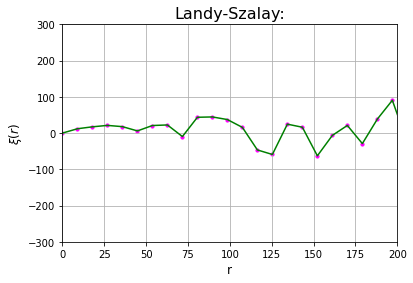

In [85]:
plt.scatter(r,e*r*r, s=10, c='magenta')
plt.plot(r,e*r*r,'green')
plt.xlim(0,200)
plt.ylim(-300,300)
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();

In [97]:
import astroML
from astroML.correlation import bootstrap_two_point_angular
from astroML.correlation import bootstrap_two_point


#bn = np.linspace(0,range_,Num_bins)
bn = np.linspace(100,300,50)
corr = astroML.correlation.two_point(data1, bn, method='standard', data_R=None, random_state=None)

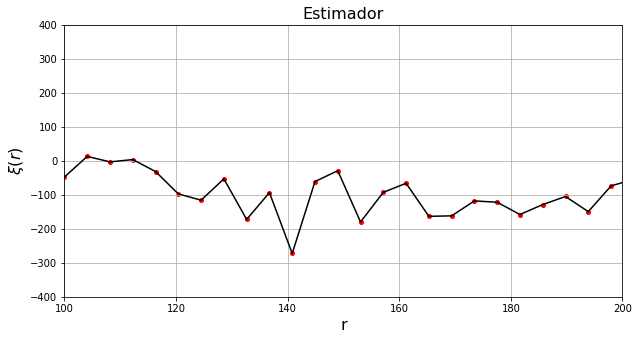

In [102]:
#bn_reduced = bn[:Num_bins-1]
bn_reduced = bn[:50-1]
fig = plt.figure(figsize=(10,5))
plt.scatter(bn_reduced,corr*bn_reduced*bn_reduced, s=16, c='red')
plt.plot(bn_reduced,corr*bn_reduced*bn_reduced,'k-')
plt.xlim(100,200)
plt.ylim(-400,400)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();

### Con astroML obtenemos lo siguiente:

In [103]:
bn = np.linspace(0,range_,Num_bins)
corr = astroML.correlation.two_point(data2, bn, method='standard', data_R=None, random_state=None)

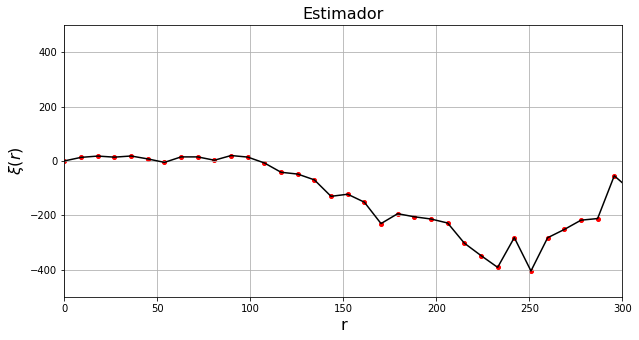

In [104]:
bn_reduced = bn[:Num_bins-1]
fig = plt.figure(figsize=(10,5))
plt.scatter(bn_reduced,corr*bn_reduced*bn_reduced, s=16, c='red')
plt.plot(bn_reduced,corr*bn_reduced*bn_reduced,'k-')
plt.xlim(0,300)
plt.ylim(-500,500)
plt.xlabel('r',fontsize=16)
plt.ylabel('$\u03BE(r)$',fontsize=16)
plt.title('Estimador',fontsize=16)
plt.grid();